<a href="https://colab.research.google.com/github/marinowars/Examen1/blob/main/Lastmile_delivery_operations_mit_lift_lab_serving_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importamos las librerías pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [7]:
#Carga desde un archivo .xlsx sin indice
Delivery= pd.read_csv("lastmile_delivery_operations_mit_lift_lab_serving_customer.csv")

In [ ]:
#Verificamos información del DataFrame
Delivery.info()

In [ ]:
#Imprimo los primeros 5 registros del dataframe
Delivery.head()

**VALORES NULOS**

In [10]:
#Identificar valores nulos por columna
valores_nulos=Delivery.isnull().sum()
valores_nulos

_child_record_id                           0
_record_id                                 0
_parent_id                                 0
_title                                     0
_version                                   0
_created_at                                0
_updated_at                                0
_created_by                                0
_updated_by                                0
_index                                     0
_geometry                                  0
_latitude                                  0
_longitude                                 0
_changeset_id                              0
_created_duration                          0
_updated_duration                          0
_edited_duration                           0
name_of_the_store                          0
entering_the_store                         0
number_of_customers_in_store               0
number_of_suppliers_in_store               0
picture_cargo_being_delivered             10
picture_ca

In [ ]:
#Realizamos una copia del dataframe
data1=Delivery.copy()
data1

In [15]:
#Sustituir valores nulos por un string en concreto
data1["picture_cargo_being_delivered"]=data1["picture_cargo_being_delivered"].fillna("Sin Imágen")
#Este método fue utilizado para llenar las celdas vacías dentro del dataframe por medio de un valor alfanumérico específico (string), ya
#que la columna no contiene algún valor numérico.

In [16]:
#Corroboramos valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos

_child_record_id                           0
_record_id                                 0
_parent_id                                 0
_title                                     0
_version                                   0
_created_at                                0
_updated_at                                0
_created_by                                0
_updated_by                                0
_index                                     0
_geometry                                  0
_latitude                                  0
_longitude                                 0
_changeset_id                              0
_created_duration                          0
_updated_duration                          0
_edited_duration                           0
name_of_the_store                          0
entering_the_store                         0
number_of_customers_in_store               0
number_of_suppliers_in_store               0
picture_cargo_being_delivered              0
picture_ca

In [17]:
#Sustituir valores nulos por un string en concreto
data1["picture_cargo_being_delivered_captions"]=data1["picture_cargo_being_delivered_captions"].fillna("Sin Imágen")
#Este método fue utilizado para llenar las celdas vacías dentro del dataframe por medio de un valor alfanumérico específico (string), ya
#que la columna no contiene algún valor numérico.

In [18]:
#Corroboramos valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos

_child_record_id                           0
_record_id                                 0
_parent_id                                 0
_title                                     0
_version                                   0
_created_at                                0
_updated_at                                0
_created_by                                0
_updated_by                                0
_index                                     0
_geometry                                  0
_latitude                                  0
_longitude                                 0
_changeset_id                              0
_created_duration                          0
_updated_duration                          0
_edited_duration                           0
name_of_the_store                          0
entering_the_store                         0
number_of_customers_in_store               0
number_of_suppliers_in_store               0
picture_cargo_being_delivered              0
picture_ca

In [19]:
#Sustituir valores nulos por un string en concreto
data1["picture_cargo_being_delivered_urls"]=data1["picture_cargo_being_delivered_urls"].fillna("Sin Imágen")
#Este método fue utilizado para llenar las celdas vacías dentro del dataframe por medio de un valor alfanumérico específico (string), ya
#que la columna no contiene algún valor numérico.

In [20]:
#Corroboramos valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos

_child_record_id                          0
_record_id                                0
_parent_id                                0
_title                                    0
_version                                  0
_created_at                               0
_updated_at                               0
_created_by                               0
_updated_by                               0
_index                                    0
_geometry                                 0
_latitude                                 0
_longitude                                0
_changeset_id                             0
_created_duration                         0
_updated_duration                         0
_edited_duration                          0
name_of_the_store                         0
entering_the_store                        0
number_of_customers_in_store              0
number_of_suppliers_in_store              0
picture_cargo_being_delivered             0
picture_cargo_being_delivered_ca

In [21]:
#Corroboramos valores nulos en todo el dataframe
valores_nulos=data1.isnull().sum().sum()
valores_nulos
#se hace una última revisión en búsqueda de algún valor nulo que se pudo haber pasado por alto

0

**OUTLIERS**

<Figure size 1080x576 with 0 Axes>

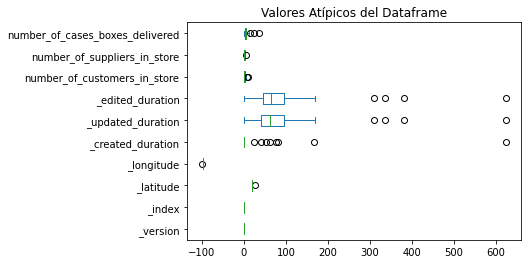

In [22]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15,8))
data1.plot(kind="box", vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [23]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data1["number_of_cases_boxes_delivered"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q2
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 12.0
Limite inferior permitido -4.0


In [ ]:
#Encontramos Outliers
outliers_iqr= data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios
data_clean_iqr= data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

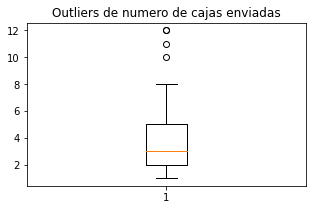

In [26]:
#Realizamos diagrama de caja o bigote
fig= plt.figure(figsize =(5,3))
plt.boxplot(data_clean_iqr["number_of_cases_boxes_delivered"])
plt.title("Outliers de numero de cajas enviadas")
plt.show() #dibujamos el diagrama

In [29]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data1["number_of_suppliers_in_store"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q2
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 3.5
Limite inferior permitido -0.5


In [ ]:
#Encontramos Outliers
outliers_iqr= data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios
data_clean_iqr= data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

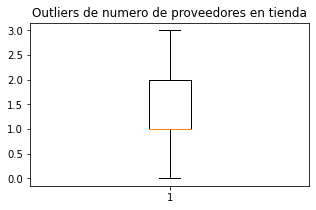

In [32]:
#Realizamos diagrama de caja o bigote
fig= plt.figure(figsize =(5,3))
plt.boxplot(data_clean_iqr["number_of_suppliers_in_store"])
plt.title("Outliers de numero de proveedores en tienda")
plt.show() #dibujamos el diagrama

In [33]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data1["number_of_customers_in_store"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q2
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 5.0
Limite inferior permitido -3.0


In [ ]:
#Encontramos Outliers
outliers_iqr= data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios
data_clean_iqr= data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

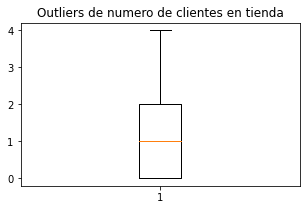

In [36]:
#Realizamos diagrama de caja o bigote
fig= plt.figure(figsize =(5,3))
plt.boxplot(data_clean_iqr["number_of_customers_in_store"])
plt.title("Outliers de numero de clientes en tienda")
plt.show() #dibujamos el diagrama

In [37]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data1["_edited_duration"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q2
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 172.0
Limite inferior permitido -32.0


In [ ]:
#Encontramos Outliers
outliers_iqr= data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios
data_clean_iqr= data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

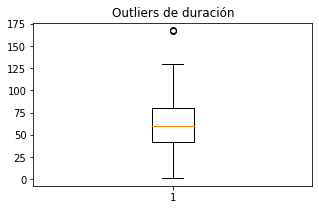

In [40]:
#Realizamos diagrama de caja o bigote
fig= plt.figure(figsize =(5,3))
plt.boxplot(data_clean_iqr["_edited_duration"])
plt.title("Outliers de duración")
plt.show() #dibujamos el diagrama

In [41]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data1["_updated_duration"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q2
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 177.25
Limite inferior permitido -40.75


In [ ]:
#Encontramos Outliers
outliers_iqr= data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios
data_clean_iqr= data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

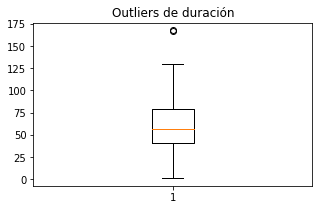

In [44]:
#Realizamos diagrama de caja o bigote
fig= plt.figure(figsize =(5,3))
plt.boxplot(data_clean_iqr["_updated_duration"])
plt.title("Outliers de duración")
plt.show() #dibujamos el diagrama

In [45]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data1["_created_duration"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q2
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 0.0
Limite inferior permitido 0.0


In [ ]:
#Encontramos Outliers
outliers_iqr= data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios
data_clean_iqr= data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

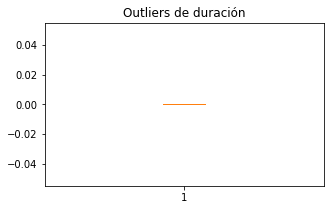

In [48]:
#Realizamos diagrama de caja o bigote
fig= plt.figure(figsize =(5,3))
plt.boxplot(data_clean_iqr["_created_duration"])
plt.title("Outliers de duración")
plt.show() #dibujamos el diagrama

In [49]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data1["_longitude"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q2
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido -98.181766665
Limite inferior permitido -98.31911062500001


In [ ]:
#Encontramos Outliers
outliers_iqr= data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios
data_clean_iqr= data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

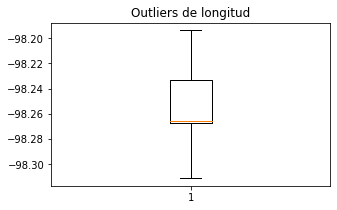

In [52]:
#Realizamos diagrama de caja o bigote
fig= plt.figure(figsize =(5,3))
plt.boxplot(data_clean_iqr["_longitude"])
plt.title("Outliers de longitud")
plt.show() #dibujamos el diagrama

In [53]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data1["_latitude"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q2
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 19.11896076250001
Limite inferior permitido 18.935810422499998


In [ ]:
#Encontramos Outliers
outliers_iqr= data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios
data_clean_iqr= data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

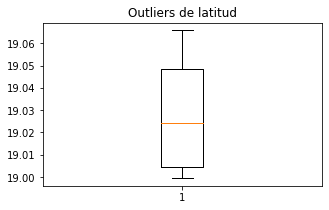

In [56]:
#Realizamos diagrama de caja o bigote
fig= plt.figure(figsize =(5,3))
plt.boxplot(data_clean_iqr["_latitude"])
plt.title("Outliers de latitud")
plt.show() #dibujamos el diagrama

In [57]:
#Convertir DataFrame a CSV
data1.to_csv("Lastmile_delivery_operations_mit_lift_lab_datos_limpios.csv")

In [58]:
#descargar archivo filtrado en csv
from google.colab import files

files.download("Lastmile_delivery_operations_mit_lift_lab_datos_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>